In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

%matplotlib inline
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
without_df = pd.read_csv("../data/zipcodes_df_final.csv")
without_df.head()

,zip_code,2011 total household,2011 household median income,2011 total families,2011 families median income,2011 total married couple families,2011 married couple families median income,2011 total non family households,2011 non family households median income,2015 total household,2015 household median income,2015 total families,2015 families median income,2015 total married couple families,2015 married couple families median income,2015 total non family households,2015 non family households median income,2020 total household,2020 household median income,2020 total families,2020 families median income,2020 total married couple families,2020 married couple families median income,2020 total non family households,2020 non family households median income,2011 population,2011 median age,2015 population,2015 median age,2020 population,2020 median age,"2011 Less than 50,000","2011 50,000-99,999","2011 100,000-149,999","2011 150,000-199,999","2011 200,000-299,999","2011 300,000-499,999","2011 500,000-999,999","2011 1,000,000-+",2011 Median Value,"2015 Less than 50,000","2015 50,000-99,999","2015 100,000-149,999","2015 150,000-199,999","2015 200,000-299,999","2015 300,000-499,999","2015 500,000-999,999","2015 1,000,000-+",2015 Median Value,"2020 Less than 50,000","2020 50,000-99,999","2020 100,000-149,999","2020 150,000-199,999","2020 200,000-299,999","2020 300,000-499,999","2020 500,000-999,999","2020 1,000,000-+",2020 Median Value
0,37013,"30,245","48,198","18,524","57,348","12,583","67,580","11,721","37,043","33,117","48,423","20,499","56,074","13,443","67,487","12,618","38,067","36,217","60,602","23,302","66,420","15,188","76,702","12,915","47,725","76,983",31.2,"90,073",31.8,"99,109",31.8,521,"1,374","7,447","5,266","2,712",472,166,39,"148,000",620,"1,800","6,982","5,845","2,160",481,149,66,"147,600",636,727,"2,716","5,454","7,622","2,623",241,188,"205,800"
1,37015,"6,577","45,018","4,545","53,102","3,186","63,900","2,032","26,038","6,734","47,253","4,615","58,831","3,550","67,551","2,119","30,930","6,821","59,144","4,743","64,059","3,414","73,448","2,078","34,010","16,976",38.6,"18,361",39.7,"17,835",41.5,497,858,"1,413","1,071",782,266,110,41,"139,100",399,972,"1,472",870,996,249,67,8,"139,800",258,562,"1,118",992,"1,253",625,185,0,"175,400"
2,37027,"17,346","113,696","13,954","131,049","12,646","140,678","3,392","49,671","18,642","119,570","15,150","139,167","13,725","148,871","3,492","54,059","20,608","133,254","15,670","162,549","14,144","172,821","4,938","62,997","48,067",41.0,"53,242",41.2,"57,096",41.8,117,95,318,679,"1,865","6,339","4,659","1,053","444,100",219,106,373,687,"1,702","6,300","5,644","1,014","456,000",159,49,177,262,911,"3,937","9,768","1,891","627,700"
3,37064,"17,869","72,798","13,549","87,741","11,289","100,782","4,320","38,988","19,527","80,898","14,783","99,522","12,328",(X),"4,744","38,965","21,795","105,342","16,861","122,202","14,497","133,614","4,934","43,996","48,318",39.3,"53,212",40.0,"60,272",40.8,393,376,903,"1,649","3,672","4,785","2,007",434,"303,500",527,312,"1,120","1,206","3,583","5,573","2,199",438,"319,200",236,70,318,522,"1,768","7,203","6,153",921,"460,900"
4,37072,"11,747","51,353","8,158","61,942","6,211","69,528","3,589","35,430","12,458","57,846","8,262","67,047","5,942",(X),"4,196","35,781","12,869","62,655","8,205","80,254","5,827","89,630","4,664","41,850","29,279",41.8,"31,392",42.6,"31,134",43.4,569,596,"1,748","2,277","1,697","1,088",257,20,"174,500",533,430,"1,918","2,232","1,838","1,186",183,59,"172,200",401,247,693,"1,677","3,288","2,160",353,50,"237,500"


In [3]:
without_df1 = without_df.replace(',', '', regex=True)
without_df1['zip_code'] = without_df1['zip_code'].astype(str)
without_df1[['2011 household median income', '2015 household median income', '2020 household median income']] = without_df1[['2011 household median income', '2015 household median income', '2020 household median income']].astype(int)
without_df1.head()

,zip_code,2011 total household,2011 household median income,2011 total families,2011 families median income,2011 total married couple families,2011 married couple families median income,2011 total non family households,2011 non family households median income,2015 total household,2015 household median income,2015 total families,2015 families median income,2015 total married couple families,2015 married couple families median income,2015 total non family households,2015 non family households median income,2020 total household,2020 household median income,2020 total families,2020 families median income,2020 total married couple families,2020 married couple families median income,2020 total non family households,2020 non family households median income,2011 population,2011 median age,2015 population,2015 median age,2020 population,2020 median age,"2011 Less than 50,000","2011 50,000-99,999","2011 100,000-149,999","2011 150,000-199,999","2011 200,000-299,999","2011 300,000-499,999","2011 500,000-999,999","2011 1,000,000-+",2011 Median Value,"2015 Less than 50,000","2015 50,000-99,999","2015 100,000-149,999","2015 150,000-199,999","2015 200,000-299,999","2015 300,000-499,999","2015 500,000-999,999","2015 1,000,000-+",2015 Median Value,"2020 Less than 50,000","2020 50,000-99,999","2020 100,000-149,999","2020 150,000-199,999","2020 200,000-299,999","2020 300,000-499,999","2020 500,000-999,999","2020 1,000,000-+",2020 Median Value
0,37013,30245,48198,18524,57348,12583,67580,11721,37043,33117,48423,20499,56074,13443,67487,12618,38067,36217,60602,23302,66420,15188,76702,12915,47725,76983,31.2,90073,31.8,99109,31.8,521,1374,7447,5266,2712,472,166,39,148000,620,1800,6982,5845,2160,481,149,66,147600,636,727,2716,5454,7622,2623,241,188,205800
1,37015,6577,45018,4545,53102,3186,63900,2032,26038,6734,47253,4615,58831,3550,67551,2119,30930,6821,59144,4743,64059,3414,73448,2078,34010,16976,38.6,18361,39.7,17835,41.5,497,858,1413,1071,782,266,110,41,139100,399,972,1472,870,996,249,67,8,139800,258,562,1118,992,1253,625,185,0,175400
2,37027,17346,113696,13954,131049,12646,140678,3392,49671,18642,119570,15150,139167,13725,148871,3492,54059,20608,133254,15670,162549,14144,172821,4938,62997,48067,41.0,53242,41.2,57096,41.8,117,95,318,679,1865,6339,4659,1053,444100,219,106,373,687,1702,6300,5644,1014,456000,159,49,177,262,911,3937,9768,1891,627700
3,37064,17869,72798,13549,87741,11289,100782,4320,38988,19527,80898,14783,99522,12328,(X),4744,38965,21795,105342,16861,122202,14497,133614,4934,43996,48318,39.3,53212,40.0,60272,40.8,393,376,903,1649,3672,4785,2007,434,303500,527,312,1120,1206,3583,5573,2199,438,319200,236,70,318,522,1768,7203,6153,921,460900
4,37072,11747,51353,8158,61942,6211,69528,3589,35430,12458,57846,8262,67047,5942,(X),4196,35781,12869,62655,8205,80254,5827,89630,4664,41850,29279,41.8,31392,42.6,31134,43.4,569,596,1748,2277,1697,1088,257,20,174500,533,430,1918,2232,1838,1186,183,59,172200,401,247,693,1677,3288,2160,353,50,237500


In [4]:
without_df2 = without_df1[['zip_code', '2011 household median income', '2015 household median income', '2020 household median income']]
without_df2.head()

,zip_code,2011 household median income,2015 household median income,2020 household median income
0,37013,48198,48423,60602
1,37015,45018,47253,59144
2,37027,113696,119570,133254
3,37064,72798,80898,105342
4,37072,51353,57846,62655


In [5]:
without_df2['average growth'] = without_df2[['2011 household median income', '2015 household median income', '2020 household median income']].mean(1).round()

without_df2['growth rate'] = (without_df2['2020 household median income']-without_df2['2011 household median income'])/without_df2['2011 household median income']*100

without_df2.head()

C:\Users\sarah\AppData\Local\Temp\ipykernel_23872\574803999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_df2['average growth'] = without_df2[['2011 household median income', '2015 household median income', '2020 household median income']].mean(1).round()
C:\Users\sarah\AppData\Local\Temp\ipykernel_23872\574803999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_df2['growth rate'] = (without_df2['2020 household median income']-without_df2['2011 household median income'])/without_df2

,zip_code,2011 household median income,2015 household median income,2020 household median income,average growth,growth rate
0,37013,48198,48423,60602,52408.0,25.735508
1,37015,45018,47253,59144,50472.0,31.378560
2,37027,113696,119570,133254,122173.0,17.202012
3,37064,72798,80898,105342,86346.0,44.704525
4,37072,51353,57846,62655,57285.0,22.008451


In [6]:
without_df3 = without_df2.nlargest(5, 'average growth')
without_df3

,zip_code,2011 household median income,2015 household median income,2020 household median income,average growth,growth rate
2,37027,113696,119570,133254,122173.0,17.202012
10,37135,97438,103333,128281,109684.0,31.653975
23,37220,95878,104297,117917,106031.0,22.986504
19,37215,90899,103693,122715,105769.0,35.001485
15,37205,82476,86824,107876,92392.0,30.796838


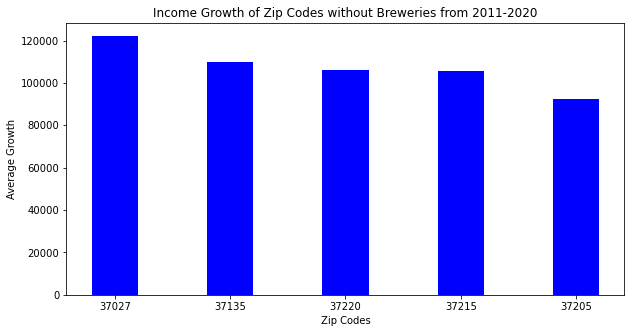

In [35]:
##chart showing the average growth of income of zipcodes without breweries from 2011-2020 

x = without_df3['zip_code']
y = without_df3['average growth']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)

plt.xlabel("Zip Codes")
plt.ylabel("Average Growth")
plt.title("Income Growth of Zip Codes without Breweries from 2011-2020")
plt.show();

In [8]:
without_df4 = without_df2.nlargest(5, 'growth rate')
without_df4

,zip_code,2011 household median income,2015 household median income,2020 household median income,average growth,growth rate
22,37219,44543,50700,85463,60235.0,91.866287
14,37201,51678,58508,92827,67671.0,79.625760
13,37189,46068,48115,74963,56382.0,62.722497
3,37064,72798,80898,105342,86346.0,44.704525
17,37212,50531,54140,71699,58790.0,41.891116


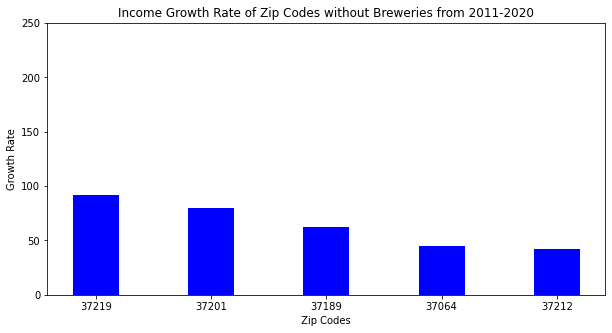

In [39]:
##showing the growth rate for zipcodes without breweries from 2011 to 2020

x = without_df4['zip_code']
y = without_df4['growth rate']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)
plt.ylim(0,250)
plt.xlabel("Zip Codes")
plt.ylabel("Growth Rate")
plt.title("Income Growth Rate of Zip Codes without Breweries from 2011-2020")
plt.show();

In [10]:
with_df = pd.read_csv("../data/breweries_final_dataframe.csv")
with_df

with_df= with_df.replace('-', 0)

In [11]:
with_df1 = with_df.replace(',', '', regex=True)
with_df1['zip_code'] = with_df1['zip_code'].astype(str)
with_df1[['2011 household median income', '2015 household median income', '2020 household median income']] = with_df1[['2011 household median income', '2015 household median income', '2020 household median income']].astype(int)
with_df1.head()

,name,rating,review_count,address,city,zip_code,state,2011 total household,2011 household median income,2011 total families,2011 families median income,2011 total married couple families,2011 married couple families median income,2011 total non family households,2011 non family households median income,2015 total household,2015 household median income,2015 total families,2015 families median income,2015 total married couple families,2015 married couple families median income,2015 total non family households,2015 non family households median income,2020 total household,2020 household median income,2020 total families,2020 families median income,2020 total married couple families,2020 married couple families median income,2020 total non family households,2020 non family households median income,2011 population,2011 median age,2015 population,2015 median age,2020 population,2020 median age,"2011 Less than 50,000","2011 50,000-99,999","2011 100,000-149,999","2011 150,000-199,999","2011 200,000-299,999","2011 300,000-499,999","2011 500,000-999,999","2011 1,000,000-+",2011 Median Value,"2015 Less than 50,000","2015 50,000-99,999","2015 100,000-149,999","2015 150,000-199,999","2015 200,000-299,999","2015 300,000-499,999","2015 500,000-999,999","2015 1,000,000-+",2015 Median Value,"2020 Less than 50,000","2020 50,000-99,999","2020 100,000-149,999","2020 150,000-199,999","2020 200,000-299,999","2020 300,000-499,999","2020 500,000-999,999","2020 1,000,000-+",2020 Median Value,opening,neighborhood
0,Tennessee Brew Works,4.5,459,809 Ewing Ave,Nashville,37203,TN,4915,25852,1453,29018,653,60139,3462,24882,5777,33072,1876,45833,967,(X),3901,28461,10201,58032,1925,66527,1230,90441,8276,54482,10465,28.6,12068,29.6,16772,31.1,9,199,288,168,469,97,37,0,193900,40,161,156,198,439,272,167,5,235800,49,7,26,25,281,918,477,45,380200,2013,SoBro
1,Jackalope Brewing Company - The Ranch,4.5,47,429B Houston St,Nashville,37203,TN,4915,25852,1453,29018,653,60139,3462,24882,5777,33072,1876,45833,967,(X),3901,28461,10201,58032,1925,66527,1230,90441,8276,54482,10465,28.6,12068,29.6,16772,31.1,9,199,288,168,469,97,37,0,193900,40,161,156,198,439,272,167,5,235800,49,7,26,25,281,918,477,45,380200,2018,Wedgewood-Houston
2,New Heights Brewing Company,4.5,100,928 Rep John Lewis Way S,Nashville,37203,TN,4915,25852,1453,29018,653,60139,3462,24882,5777,33072,1876,45833,967,(X),3901,28461,10201,58032,1925,66527,1230,90441,8276,54482,10465,28.6,12068,29.6,16772,31.1,9,199,288,168,469,97,37,0,193900,40,161,156,198,439,272,167,5,235800,49,7,26,25,281,918,477,45,380200,2016,South Nashville
3,Southern Grist Brewing,4.5,204,754 Douglas Ave,Nashville,37207,TN,12745,30780,8341,33203,3407,55298,4404,23750,13591,32396,8385,35720,3648,59621,5206,25157,15151,50583,9113,53671,4155,76397,6038,40773,32074,34.2,35497,34.9,39151,35.4,645,1638,3007,1253,536,115,24,13,117600,577,2007,2774,1389,656,247,9,30,120900,602,658,1882,1707,2294,1360,210,80,186700,2016,Cleveland Park
4,East Nashville Beer Works,4.0,111,320 E Trinity Ln,Nashville,37207,TN,12745,30780,8341,33203,3407,55298,4404,23750,13591,32396,8385,35720,3648,59621,5206,25157,15151,50583,9113,53671,4155,76397,6038,40773,32074,34.2,35497,34.9,39151,35.4,645,1638,3007,1253,536,115,24,13,117600,577,2007,2774,1389,656,247,9,30,120900,602,658,1882,1707,2294,1360,210,80,186700,2016,East Nashville


In [19]:
#need to drop the duplicated zipcodes as a result of multiple breweries having the same zipcode 
with_df2 = with_df1[['zip_code', '2011 household median income','2015 household median income','2020 household median income']].drop_duplicates()
with_df2

,zip_code,2011 household median income,2015 household median income,2020 household median income
0,37203,25852,33072,58032
3,37207,30780,32396,50583
5,37208,22679,27280,47903
7,37204,62818,69482,89954
8,37209,41023,45224,61096
13,37206,32697,43782,66065
15,37210,25662,29035,36985
16,37216,46033,45472,62214
17,37213,29125,0,0
18,37228,15819,15540,52344


In [20]:
with_df2['average growth'] = with_df2[['2011 household median income', '2015 household median income', '2020 household median income']].mean(1).round()

with_df2['growth rate'] = (with_df2['2020 household median income']-with_df2['2011 household median income'])/with_df2['2011 household median income']*100

with_df2

,zip_code,2011 household median income,2015 household median income,2020 household median income,average growth,growth rate
0,37203,25852,33072,58032,38985.0,124.477797
3,37207,30780,32396,50583,37920.0,64.337232
5,37208,22679,27280,47903,32621.0,111.221835
7,37204,62818,69482,89954,74085.0,43.197810
8,37209,41023,45224,61096,49114.0,48.931087
13,37206,32697,43782,66065,47515.0,102.052176
15,37210,25662,29035,36985,30561.0,44.123607
16,37216,46033,45472,62214,51240.0,35.150870
17,37213,29125,0,0,9708.0,-100.000000
18,37228,15819,15540,52344,27901.0,230.893230


In [21]:
with_df3 = with_df2.nlargest(5, 'average growth')
with_df3

,zip_code,2011 household median income,2015 household median income,2020 household median income,average growth,growth rate
7,37204,62818,69482,89954,74085.0,43.197810
16,37216,46033,45472,62214,51240.0,35.150870
8,37209,41023,45224,61096,49114.0,48.931087
13,37206,32697,43782,66065,47515.0,102.052176
0,37203,25852,33072,58032,38985.0,124.477797


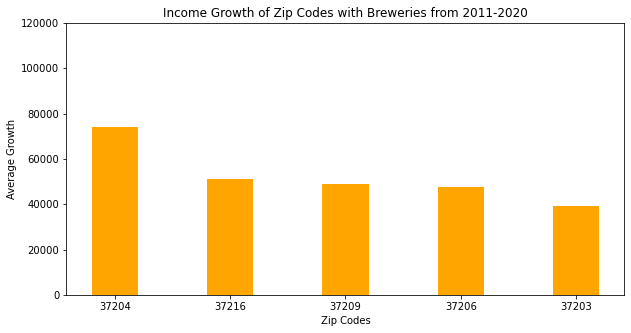

In [33]:
x = with_df3['zip_code']
y = with_df3['average growth']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='orange',
        width = 0.4)
plt.ylim(0,120000)
plt.xlabel("Zip Codes")
plt.ylabel("Average Growth")
plt.title("Income Growth of Zip Codes with Breweries from 2011-2020")
plt.show();

In [28]:
##then you need to do the growth rate for income too, so we can do a comparison. 
with_df4 = with_df2.nlargest(5, 'growth rate')
with_df4

,zip_code,2011 household median income,2015 household median income,2020 household median income,average growth,growth rate
18,37228,15819,15540,52344,27901.0,230.893230
0,37203,25852,33072,58032,38985.0,124.477797
5,37208,22679,27280,47903,32621.0,111.221835
13,37206,32697,43782,66065,47515.0,102.052176
3,37207,30780,32396,50583,37920.0,64.337232


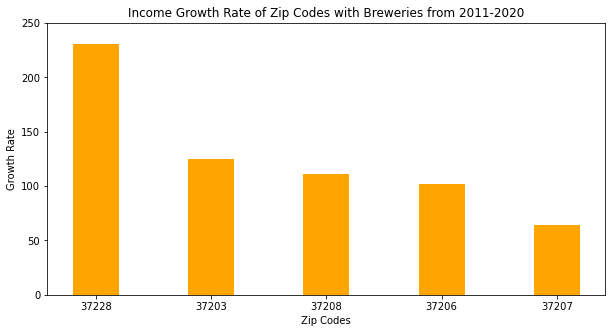

In [38]:
x = with_df4['zip_code']
y = with_df4['growth rate']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='orange',
        width = 0.4)

plt.ylim(0,250)
plt.xlabel("Zip Codes")
plt.ylabel("Growth Rate")
plt.title("Income Growth Rate of Zip Codes with Breweries from 2011-2020")
plt.show();